In [226]:
import pandas as pd
import numpy as np

In [227]:
df=pd.read_csv("train.csv")

In [228]:
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,15995,INN15996,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
1,8306,INN08307,2,0,2,5,Meal Plan 1,0,Room_Type 1,86,2018,8,4,Offline,0,0,0,85.00,0,Not_Canceled
2,8550,INN08551,2,0,0,4,Meal Plan 1,0,Room_Type 1,156,2018,11,16,Online,0,0,0,85.00,1,Canceled
3,19473,INN19474,2,0,1,3,Not Selected,0,Room_Type 1,65,2018,3,31,Online,0,0,0,76.93,0,Canceled
4,21135,INN21136,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [229]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [230]:
df.drop(columns=['Unnamed: 0', 'Booking_ID'],inplace=True)


In [231]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [232]:
df.isna().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


In [233]:
df.duplicated().sum()

np.int64(7673)

In [234]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [235]:
df.shape

(21347, 18)

Enough Data to work with

In [236]:
df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,15190
Canceled,6157


Data is imbalanced

# Data Analysis

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21347 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21347 non-null  int64  
 1   no_of_children                        21347 non-null  int64  
 2   no_of_weekend_nights                  21347 non-null  int64  
 3   no_of_week_nights                     21347 non-null  int64  
 4   type_of_meal_plan                     21347 non-null  object 
 5   required_car_parking_space            21347 non-null  int64  
 6   room_type_reserved                    21347 non-null  object 
 7   lead_time                             21347 non-null  int64  
 8   arrival_year                          21347 non-null  int64  
 9   arrival_month                         21347 non-null  int64  
 10  arrival_date                          21347 non-null  int64  
 11  market_segment_type 

In [238]:
int_but_categorical=[]
for col in df.columns:
    if df[col].dtype == 'int64' and set(df[col].unique()) <= {0, 1}:
        int_but_categorical.append(col)
        print(col)

required_car_parking_space
repeated_guest


In [239]:
numerical_column=[x for x in df.columns if df[x].dtype=='int64' or df[x].dtype=='float64']
for i in int_but_categorical:
  numerical_column.remove(i)

In [240]:
numerical_column

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [241]:
categorical_columns=[x for x in df.columns if df[x].dtype==object]

In [242]:
categorical_columns.extend(int_but_categorical)

In [243]:
categorical_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status',
 'required_car_parking_space',
 'repeated_guest']

In [244]:
data=df.copy()

## Univariate Analysis

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
def num_colum_dist(df, num_features):
  fig,axes=plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
  if len(num_features)==1:
    axes=[axes]

  for i,column in enumerate(num_features):
    sns.histplot(data=df,x=column,ax=axes[i][0],kde=True)
    axes[i][0].set_title(f"Histogram for {i}")

    sns.boxplot(data=df,x=column,ax=axes[i][1])
    axes[i][1].set_title(f"BoxPlot for {i}")

  plt.tight_layout()
  plt.show()

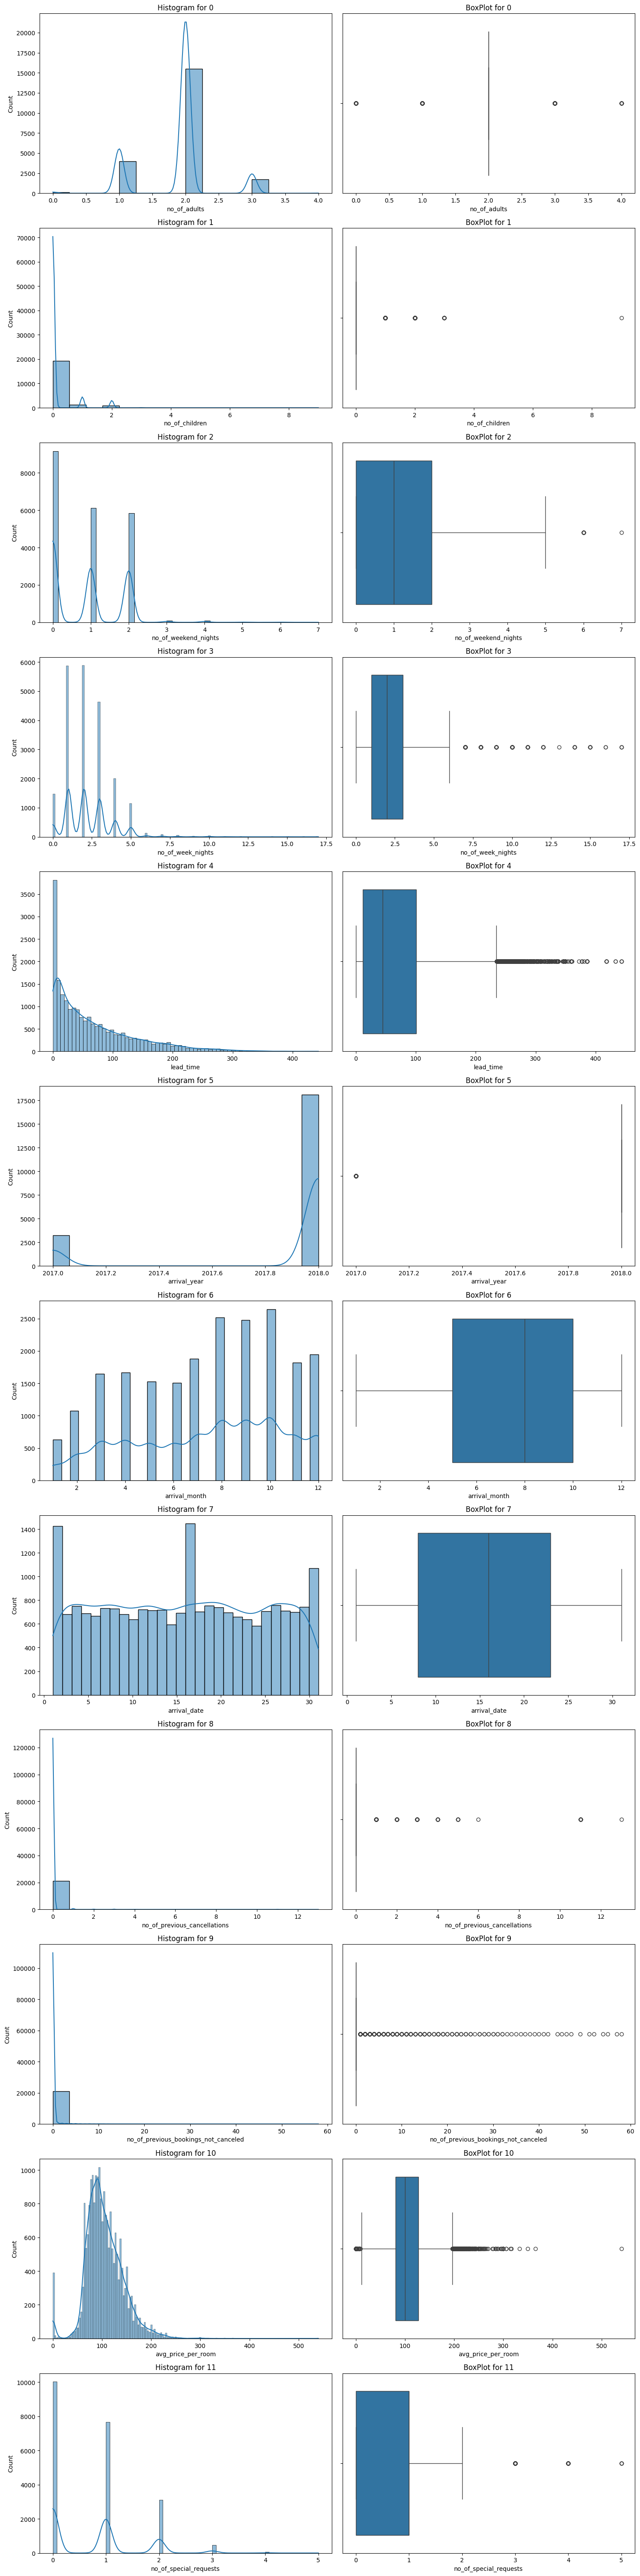

In [246]:
num_colum_dist(df=data,num_features=numerical_column)

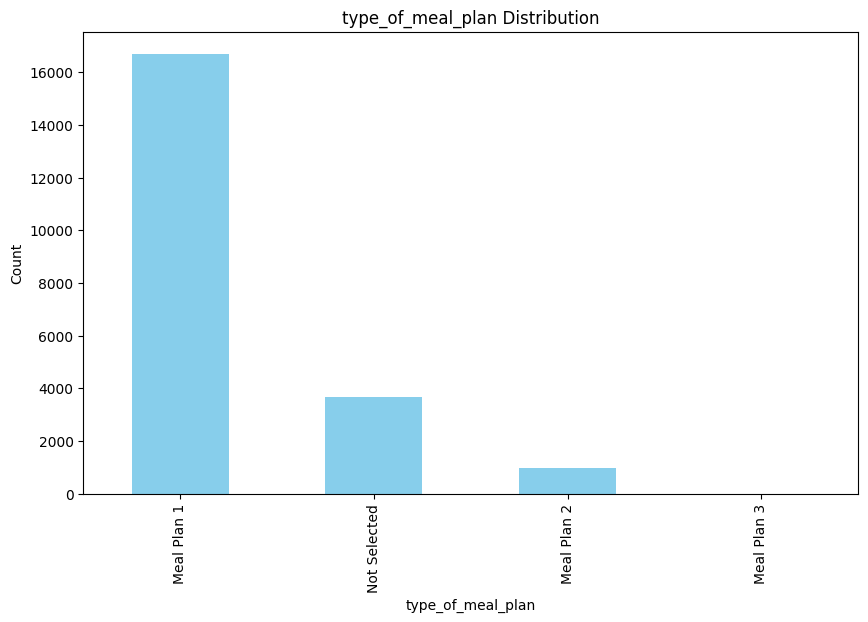

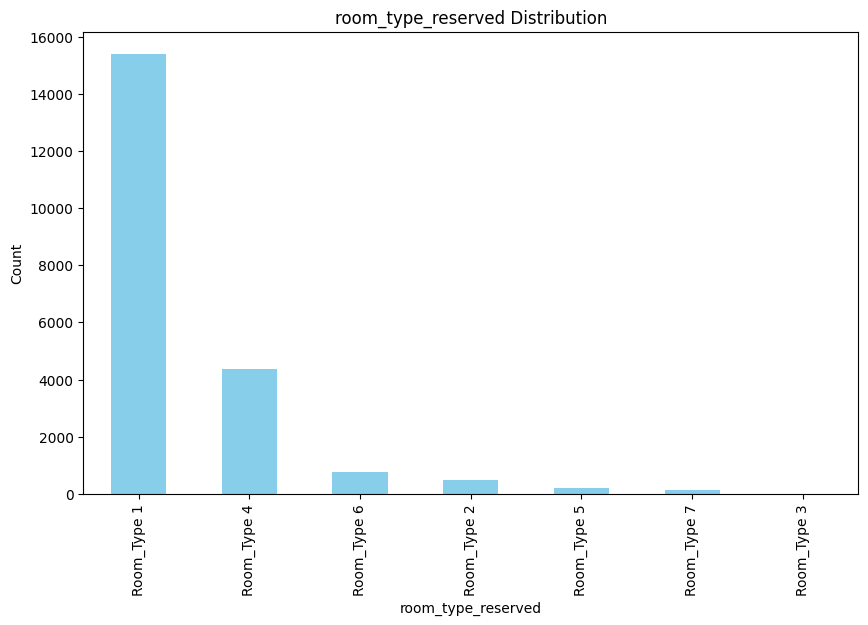

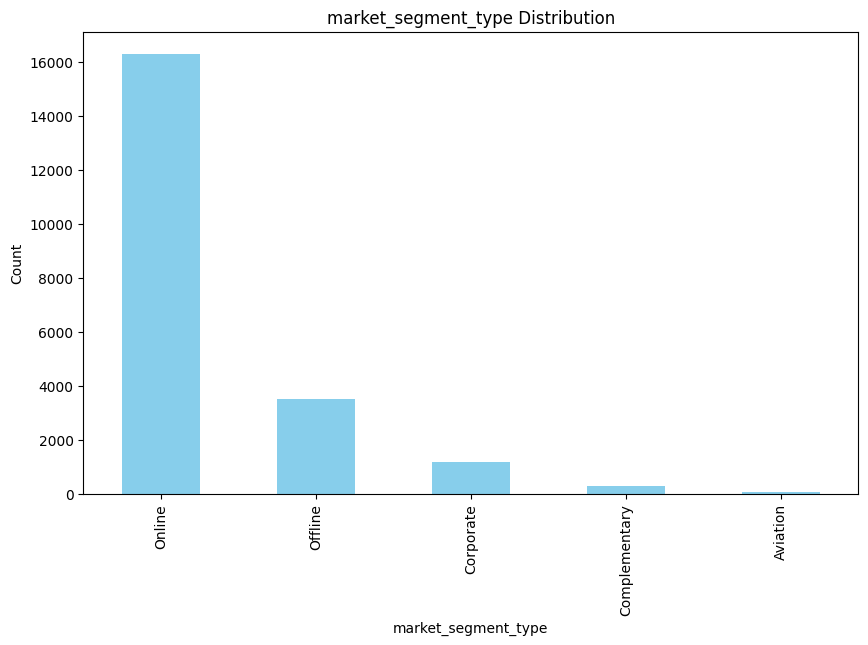

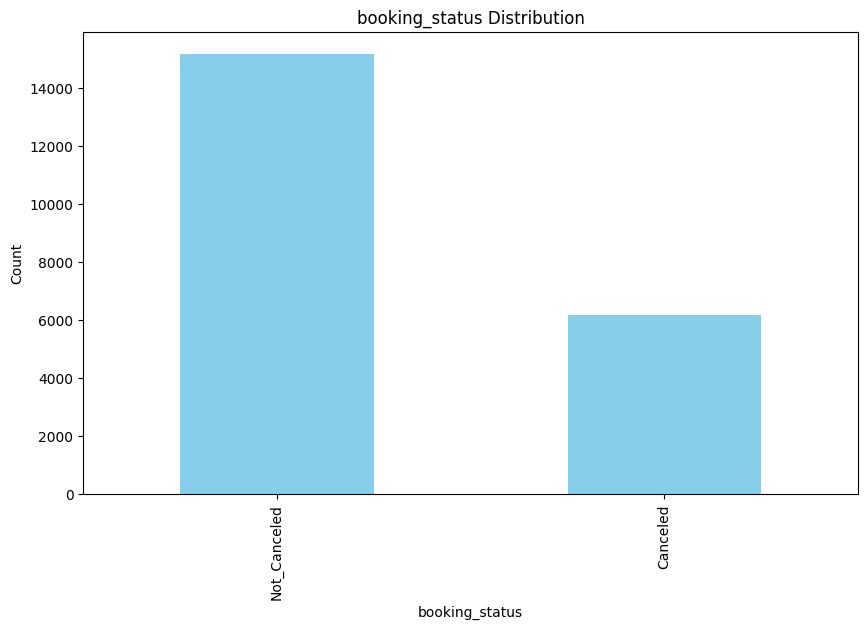

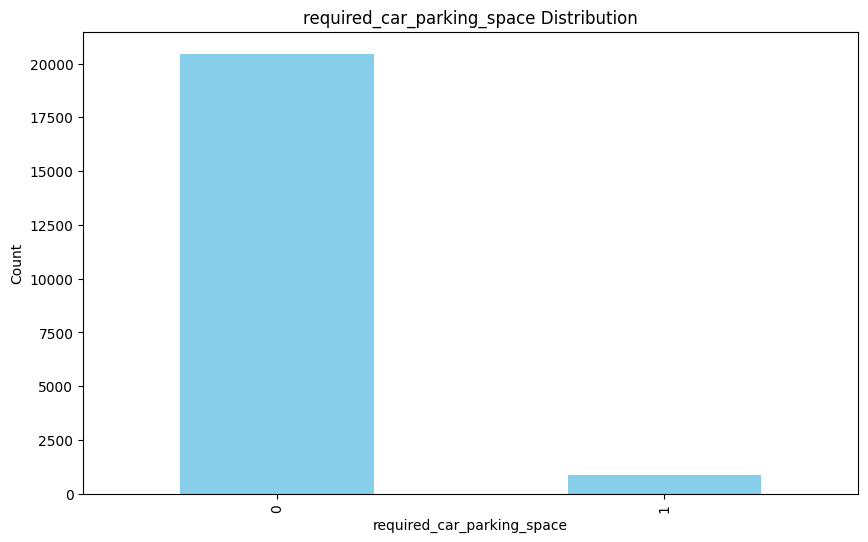

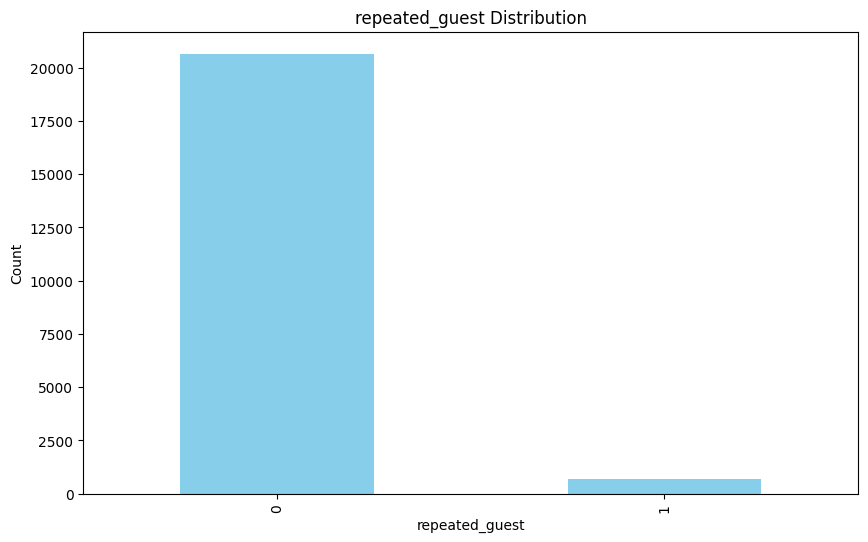

In [247]:
for cat_feature in categorical_columns:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

## Bivariate Analysis

In [248]:
def plot_bivariate(df, target, num_features):
  num_plots=len(num_features)
  num_rows=(num_plots+1)//2

  fig,axes=plt.subplots(num_rows,2,figsize=(15,num_rows*5))
  axes=axes.flatten()

  for i, column in enumerate(num_features):
    sns.boxplot(x=target,y=column,ax=axes[i],data=df)
    axes[i].set_title(f"{column} vs {target}")


  plt.tight_layout()
  plt.show()

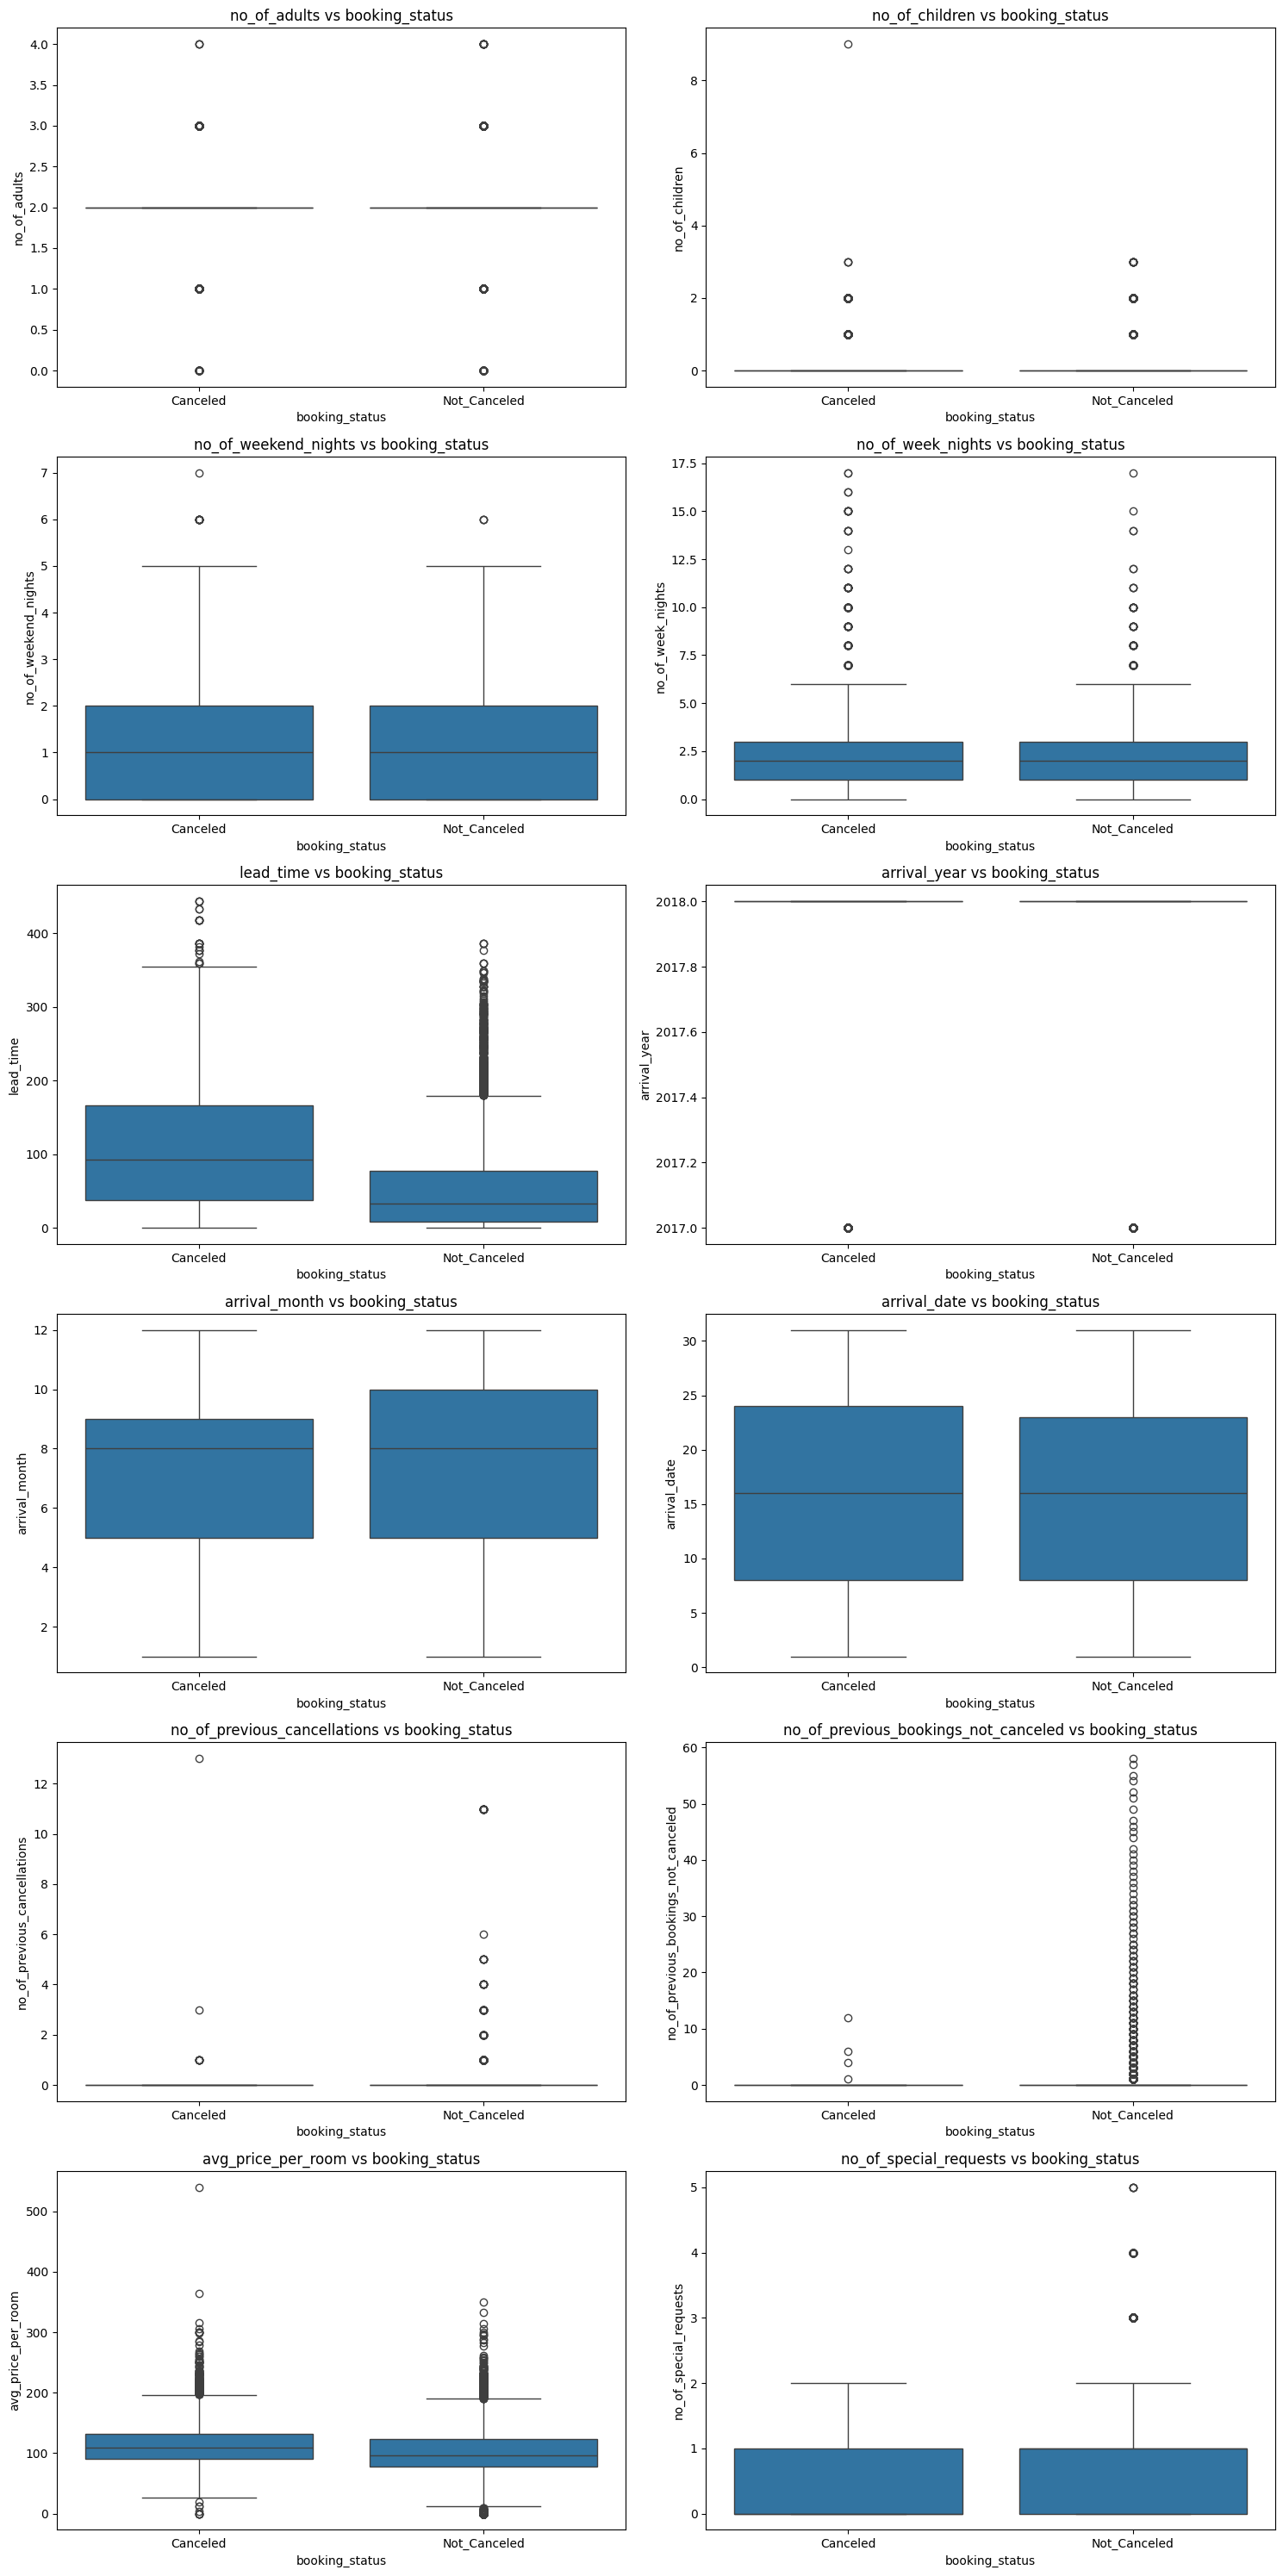

In [249]:
plot_bivariate(data,'booking_status',numerical_column)

In [250]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

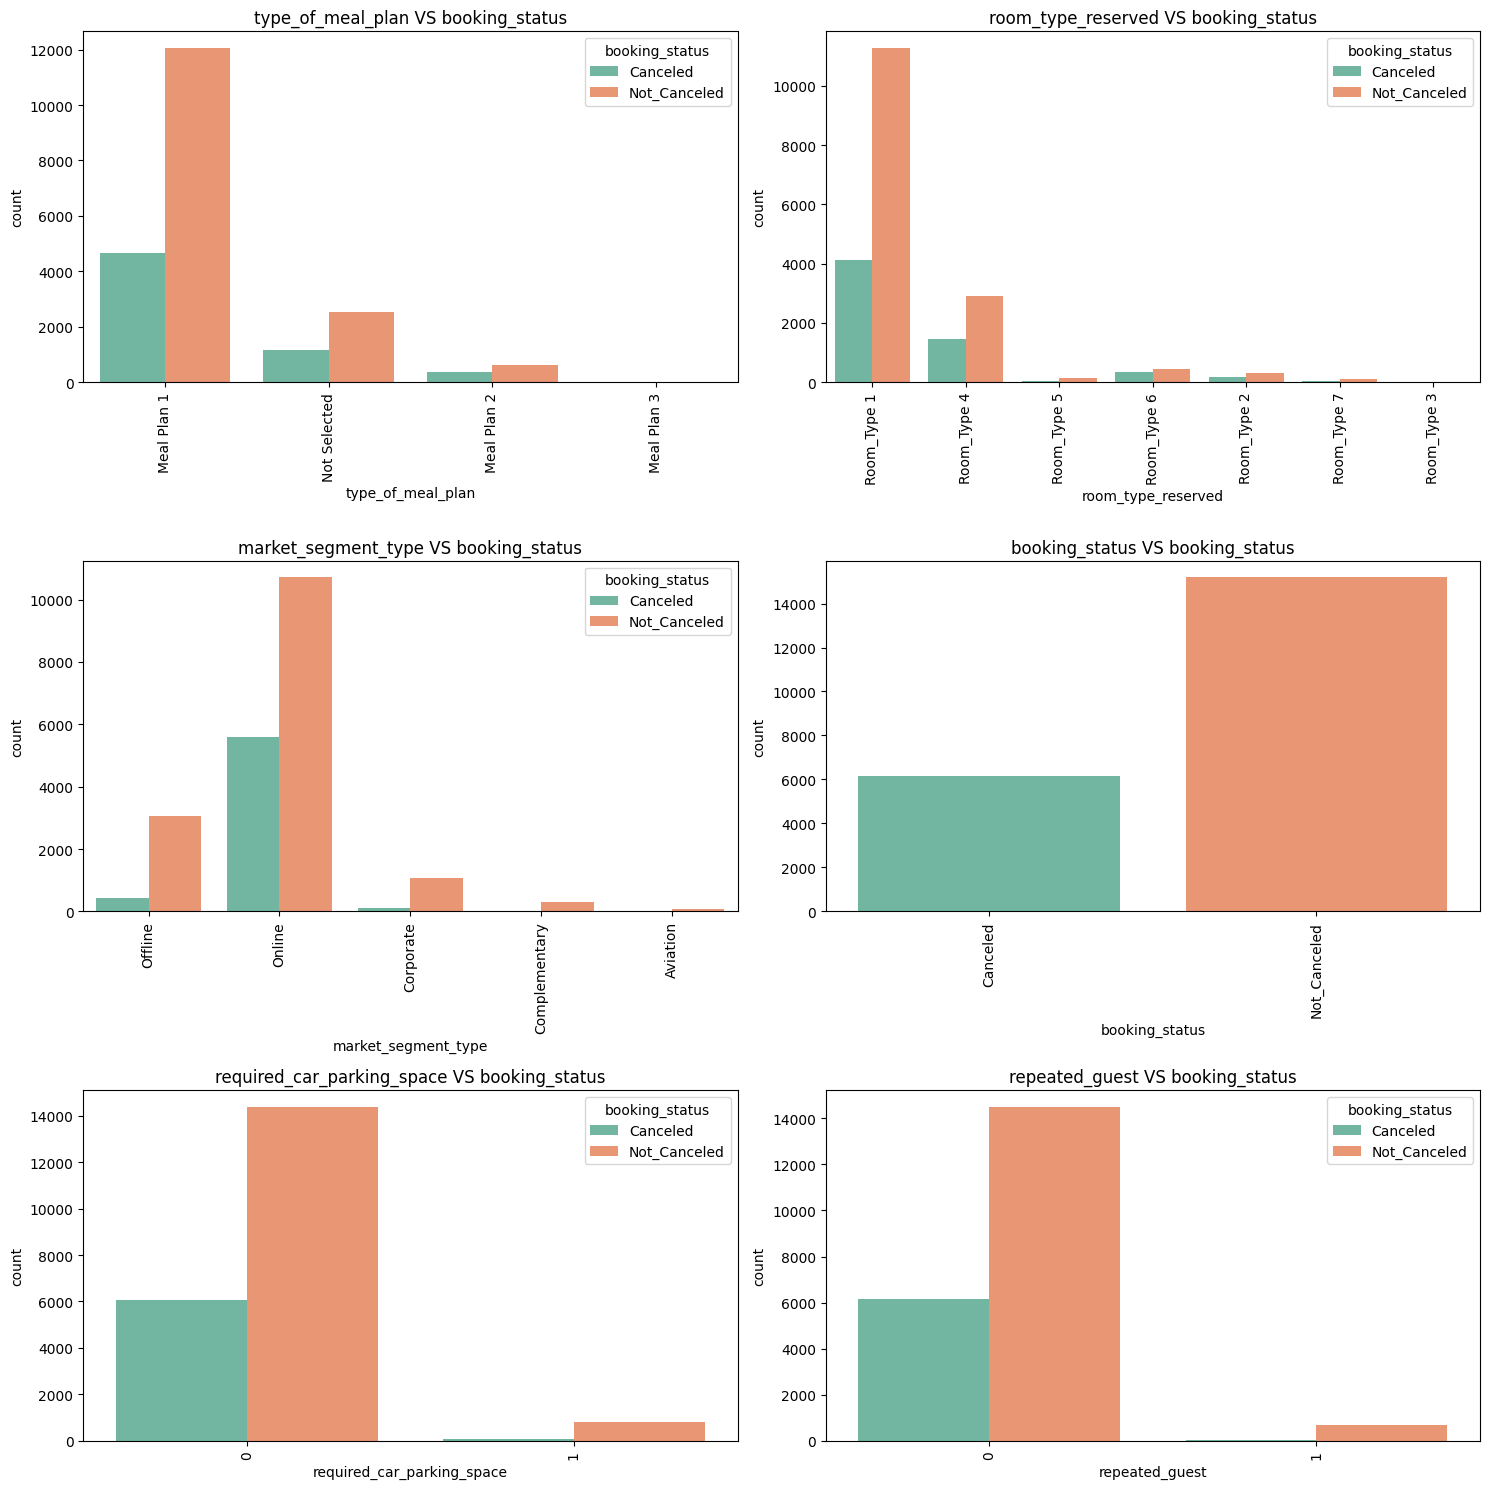

In [251]:
plot_bivaraite_cat(data , 'booking_status' , categorical_columns)

# Data Processing

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21347 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21347 non-null  int64  
 1   no_of_children                        21347 non-null  int64  
 2   no_of_weekend_nights                  21347 non-null  int64  
 3   no_of_week_nights                     21347 non-null  int64  
 4   type_of_meal_plan                     21347 non-null  object 
 5   required_car_parking_space            21347 non-null  int64  
 6   room_type_reserved                    21347 non-null  object 
 7   lead_time                             21347 non-null  int64  
 8   arrival_year                          21347 non-null  int64  
 9   arrival_month                         21347 non-null  int64  
 10  arrival_date                          21347 non-null  int64  
 11  market_segment_type 

## Label Encoding

In [253]:
from sklearn.preprocessing import LabelEncoder

In [254]:
label_encoder=LabelEncoder()

In [255]:
mappings={}

for col in categorical_columns:
  df[col]=label_encoder.fit_transform(df[col])
  mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [256]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}}

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21347 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21347 non-null  int64  
 1   no_of_children                        21347 non-null  int64  
 2   no_of_weekend_nights                  21347 non-null  int64  
 3   no_of_week_nights                     21347 non-null  int64  
 4   type_of_meal_plan                     21347 non-null  int64  
 5   required_car_parking_space            21347 non-null  int64  
 6   room_type_reserved                    21347 non-null  int64  
 7   lead_time                             21347 non-null  int64  
 8   arrival_year                          21347 non-null  int64  
 9   arrival_month                         21347 non-null  int64  
 10  arrival_date                          21347 non-null  int64  
 11  market_segment_type 

## Multicollinearity

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [259]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [260]:
vif_data

,feature,VIF
0,const,4.093028e+07
1,no_of_adults,1.336490e+00
2,no_of_children,1.296993e+00
3,no_of_weekend_nights,1.072831e+00
4,no_of_week_nights,1.124889e+00
5,type_of_meal_plan,1.178362e+00
6,required_car_parking_space,1.033080e+00
7,room_type_reserved,1.557023e+00
8,lead_time,1.406320e+00
9,arrival_year,1.295118e+00


Data don't have multicollinearity

In [261]:
corr=df.corr()

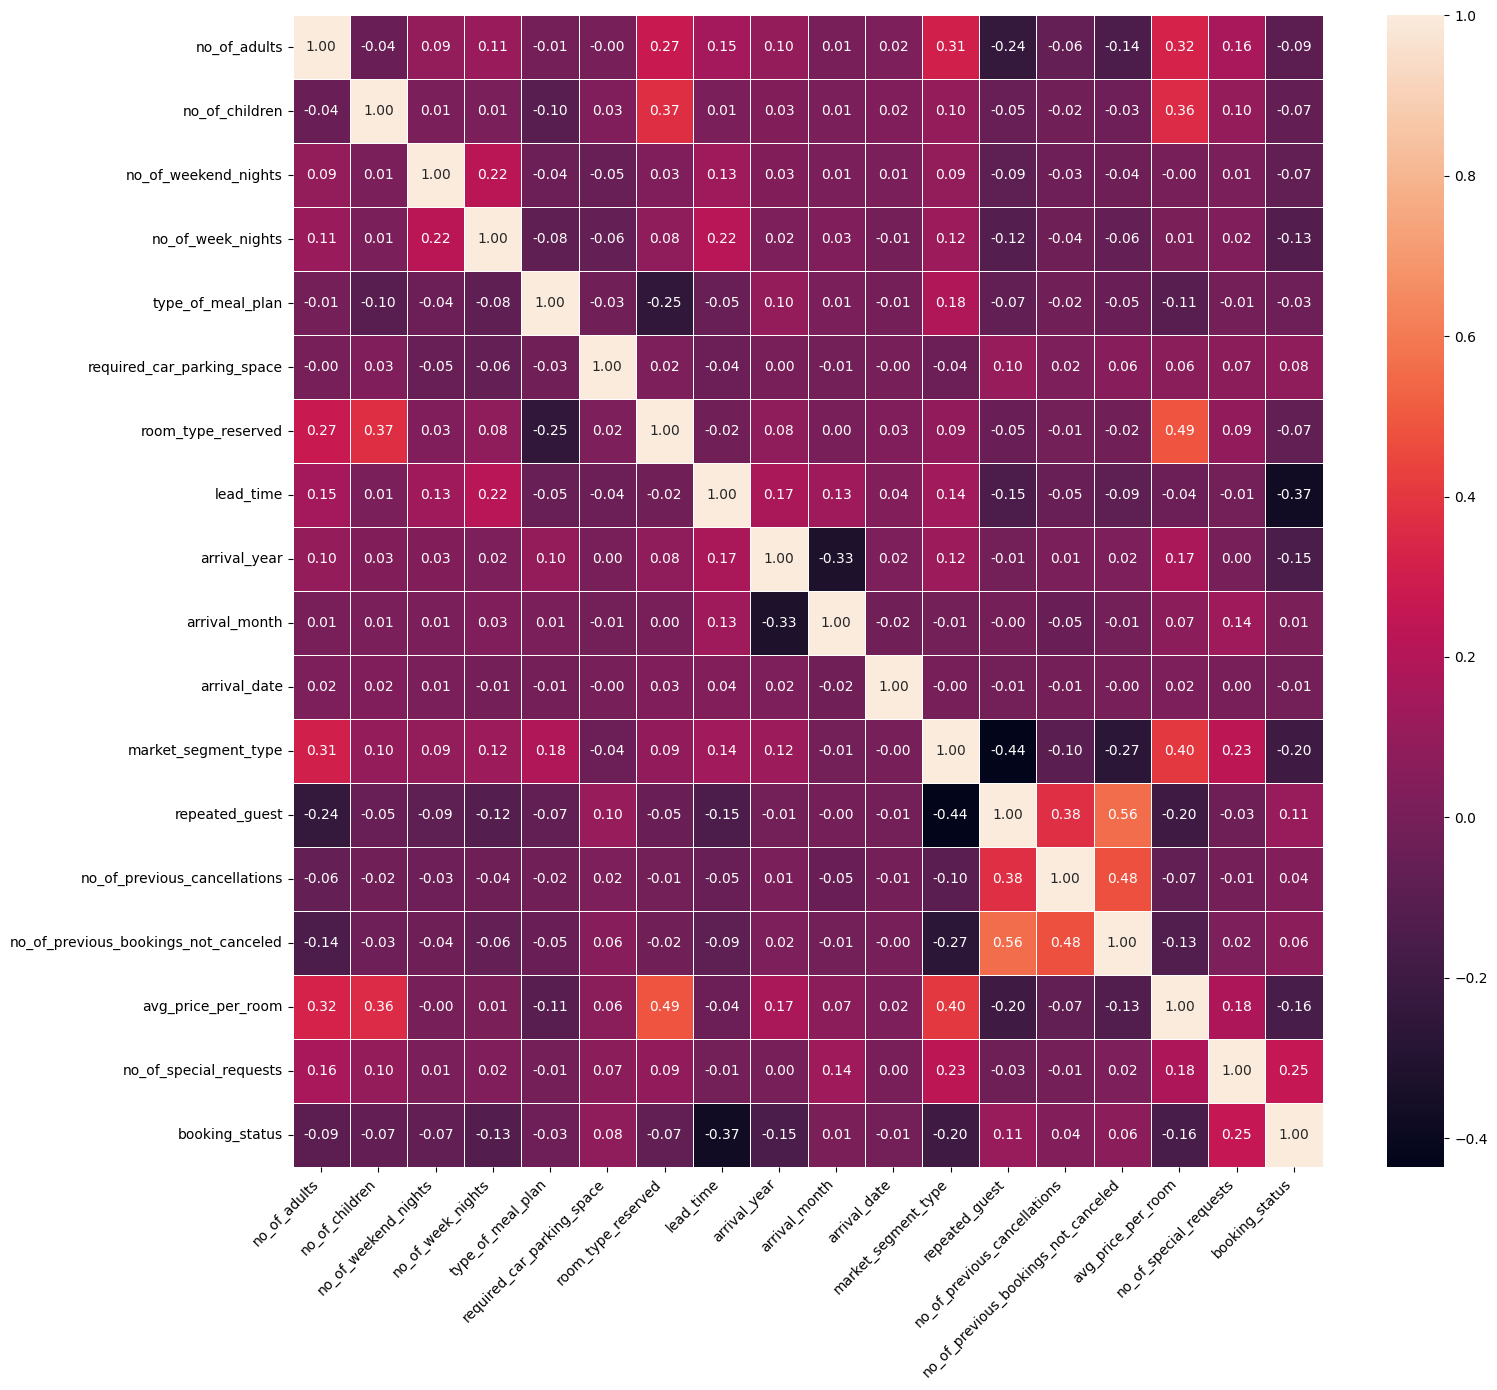

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cmap="rocket",
            annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Data's columns dont have high collinearity with each other

## Skewness

In [263]:
#check for skewness
skewness=df.skew()
skewness

,0
no_of_adults,-0.291652
no_of_children,3.630880
no_of_weekend_nights,0.655163
no_of_week_nights,1.599862
type_of_meal_plan,1.632217
required_car_parking_space,4.591926
room_type_reserved,1.393253
lead_time,1.393181
arrival_year,-1.939625
arrival_month,-0.291750


Some columns have high skewness



In [264]:
#boxcox is giving good result than log1p
from scipy.stats import boxcox
df['no_of_previous_cancellations'], _ = boxcox(df['no_of_previous_cancellations'] + 1)
df['no_of_previous_bookings_not_canceled'],_ = boxcox(df['no_of_previous_bookings_not_canceled']+1)


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21347 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21347 non-null  int64  
 1   no_of_children                        21347 non-null  int64  
 2   no_of_weekend_nights                  21347 non-null  int64  
 3   no_of_week_nights                     21347 non-null  int64  
 4   type_of_meal_plan                     21347 non-null  int64  
 5   required_car_parking_space            21347 non-null  int64  
 6   room_type_reserved                    21347 non-null  int64  
 7   lead_time                             21347 non-null  int64  
 8   arrival_year                          21347 non-null  int64  
 9   arrival_month                         21347 non-null  int64  
 10  arrival_date                          21347 non-null  int64  
 11  market_segment_type 

In [266]:
skewness=df.skew()
skewness

,0
no_of_adults,-0.291652
no_of_children,3.630880
no_of_weekend_nights,0.655163
no_of_week_nights,1.599862
type_of_meal_plan,1.632217
required_car_parking_space,4.591926
room_type_reserved,1.393253
lead_time,1.393181
arrival_year,-1.939625
arrival_month,-0.291750


## Balancing

In [267]:
df['booking_status'].value_counts()

,count
booking_status,
1,15190
0,6157


In [268]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [269]:
from imblearn.over_sampling import SMOTE

In [270]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

In [271]:
len(X_res)

30380

In [272]:
len(y_res)

30380

In [273]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [274]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,4,0,0,0,245,2018,7,6,3,0,0.0,0.0,110.00,0,0
1,2,0,2,5,0,0,0,86,2018,8,4,3,0,0.0,0.0,85.00,0,1
2,2,0,0,4,0,0,0,156,2018,11,16,4,0,0.0,0.0,85.00,1,0
3,2,0,1,3,3,0,0,65,2018,3,31,4,0,0.0,0.0,76.93,0,0
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0.0,0.0,130.00,0,0


In [275]:
balanced_df.shape

(30380, 18)

In [276]:
balanced_df['booking_status'].value_counts()

,count
booking_status,
0,15190
1,15190


Now our data is balanced

In [277]:
df=balanced_df.copy()

# Feature Selection

In [278]:
from sklearn.ensemble import RandomForestClassifier

In [279]:
X=df.drop(columns=['booking_status'])
y=df['booking_status']

In [280]:
model=RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [281]:
feature_importance_df=pd.DataFrame(
    {
        'feature':X.columns,
        'importance':model.feature_importances_
    }
)

In [282]:
feature_importance_df

,feature,importance
0,no_of_adults,0.017957
1,no_of_children,0.007037
2,no_of_weekend_nights,0.030105
3,no_of_week_nights,0.045095
4,type_of_meal_plan,0.021894
5,required_car_parking_space,0.010245
6,room_type_reserved,0.018175
7,lead_time,0.269346
8,arrival_year,0.016078
9,arrival_month,0.087373


In [283]:
top_features_importance_df=feature_importance_df.sort_values(by="importance",ascending=False)

In [284]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [285]:
top_10_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved'], dtype=object)

In [286]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,245,0,110.00,7,6,3,4,2,0,0,0
1,86,0,85.00,8,4,3,5,2,0,0,1
2,156,1,85.00,11,16,4,4,0,0,0,0
3,65,0,76.93,3,31,4,3,1,3,0,0
4,188,0,130.00,6,15,3,2,0,0,0,0


In [287]:
df=top_10_df.copy()

# Model Selection

In [297]:
for i in df.columns:
  print(f"{i} min : {df[i].min()}")
  print(f"{i} max : {df[i].max()}")


lead_time min : 0
lead_time max : 443
no_of_special_requests min : 0
no_of_special_requests max : 5
avg_price_per_room min : 0.0
avg_price_per_room max : 540.0
arrival_month min : 1
arrival_month max : 12
arrival_date min : 1
arrival_date max : 31
market_segment_type min : 0
market_segment_type max : 4
no_of_week_nights min : 0
no_of_week_nights max : 17
no_of_weekend_nights min : 0
no_of_weekend_nights max : 7
type_of_meal_plan min : 0
type_of_meal_plan max : 3
room_type_reserved min : 0
room_type_reserved max : 6
booking_status min : 0
booking_status max : 1


In [295]:
df['avg_price_per_room'].min()

0.0

In [296]:
df['avg_price_per_room'].max()

540.0

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [291]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [301]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [292]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
}

In [293]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [302]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 12198, number of negative: 12106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 24304, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501893 -> initscore=0.007571
[LightGBM] [Info] Start training from score 0.007571


In [303]:
metrics_df= pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.885945,0.876762,0.894051,0.885322
1,LogisticRegression,0.776169,0.799340,0.728275,0.762155
2,Gradient Boosting,0.839533,0.818440,0.866310,0.841695
3,Suuport vector classifier,0.719882,0.716734,0.712901,0.714812
4,Decsion Tree,0.831633,0.831147,0.825869,0.828500
5,KNN,0.782093,0.835479,0.694184,0.758306
6,Naive Bayes,0.771889,0.790521,0.730281,0.759208
7,XGboost,0.872614,0.865043,0.878342,0.871642
8,Adaboost,0.820606,0.796816,0.853275,0.824080
9,LGBM,0.863397,0.844487,0.885695,0.864600


# Train best Model

In [304]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [305]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [306]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [307]:
rf = RandomForestClassifier(random_state=42)

In [308]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False]
}

In [309]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [310]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  10.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.9s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1f43d33d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1f3b45650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1f4b76a10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb1f5b81390>},
                   random_state=42, scoring='accuracy', verbose=2)

In [311]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [312]:
best_rf_model = random_search.best_estimator_

In [313]:
y_pred = best_rf_model.predict(X_test)

In [314]:
print(f"accuracy =  {accuracy_score(y_test,y_pred)}")
print(f"precision = {precision_score(y_test,y_pred)}")
print(f"recall = {recall_score(y_test,y_pred)}")
print(f"f1 = {f1_score(y_test,y_pred)}")

accuracy =  0.8821593153390388
precision = 0.8675710594315246
recall = 0.8977272727272727
f1 = 0.8823915900131406
